Please **submit this Jupyter notebook through Canvas** no later than **Monday November 5 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

-----
# Exercise 1
Let $P_k$ be the $k$th _Legendre polynomial_ (see paragraph 7.3.4) on $[-1, 1]$.

We know that $P_0(x) = 1$, $P_1(x) = x$, and that $P_k$ satisfy the recurrence relation 

$$k P_k(x) =x (2k-1)  P_{k-1}(x) - (k-1) P_{k-2}(x).$$

We will use [_induction_](https://en.wikipedia.org/wiki/Mathematical_induction) to show that the derivatives of the Legendre polynomials satisfy

$$P_k'(1) = k(k+1)/2.$$

## (a) Base case
Show that $P_0'(1) = 0$ and $P_1'(1) = 1$.

$$\frac{dP_0(x)}{dx} = 1 \frac{d}{dx} = 0$$
$$\frac{dP_1(x)}{dx} = x \frac{d}{dx} = 1$$

## (b)  Induction Step
Let $k \geq 2$. Use the recurrence relation to show that $P_k'(1) = k(k+1)/2$.

$$kP'_{k}(x) = (x(2k-1)P'_{k-1}(x) + (2k-1)P_{k-1}(x)) - (k-1)P'_{k-2}(x)$$

pg 322 shows that $$P_k(1) = 1$$

evaluation at k = n, x = 1:

$$nP'_{n}(1) = (1(2n-1)P'_{n-1}(1) + (2n-1)P_{n-1}(1)) - (n-1)P'_{n-2}(1) \to $$

$$P'_{n}(1) = \frac{(2n-1)P'_{n-1}(1) + (2n-1)P_{n-1}(1)) - (n-1)P'_{n-2}(1)}{n}$$

$$P'_{n}(1) = \frac{(2n-1)P'_{n-1}(1) + (2n-1) - (n-1)P'_{n-2}(1)}{n}$$

Substituting in that n = 2, we find that:

$$P'_{2}(1) = \frac{(4-1)P'_{2-1}(1) + (4-1) - (2-1)P'_{2-2}(1)}{2} \to P'_{2}(1) = \frac{(3)P'_{1}(1) + (3) - (1)P'_{0}(1)}{2}$$

knowing that $P_0'(1) = 0$ and $P_1'(1) = 1$:

$$P'_{3}(1) \frac{(3) + (3)}{2} = 3$$

unsing the theorm above:

$$P_2'(1) = 2(2+1)/2 = 3$$

This shows that for 2, it holds true, so if we step forward by another 1, we would have:

$$P'_{2+1}(1) = \frac{(2(2+1)-1)P'_{(2+1)-1}(1) + (2(2+1)-1) - ((2+1)-1)P'_{(2+1)-2}(1)}{3}$$

$$P'_{3}(1) = \frac{(5)P'_{2}(1) + (5) - (2)P'_{1}(1)}{3}$$

$$P'_{3}(1) = \frac{18}{3} = 6$$

and the theorm above: 

$$P_3'(1) = 3(3+1)/2 = 6$$

The above shows it is true for the first 4 steps(0-3) that it hold: now assuming that:

$$P'_{n-2}(1) = (n-2)(n-1)/2 = \frac{n^2 - 3n + 2}{2}$$

$$P'_{n-1}(1) = n-1(n)/2 = \frac{n^2 - n}{2}$$

$$P'_{n}(1) = \frac{(2n-1)P'_{n-1}(1) + (2n-1) - (n-1)P'_{n-2}(1)}{n}$$

and substituting into the equation

$$P'_{n}(1) = \frac{(2n-1)\frac{n^2 - n}{2} + (2n-1) - (n-1)\frac{n^2 - 3n + 2}{2}}{n}$$

$$P'_{n}(1) = \frac{(2n-1)\frac{n^2 - n}{2} + (2n-1) + (1 - n)\frac{n^2 - 3n + 2}{2}}{n} * \frac{2}{2}$$

$$P'_{n}(1) = \frac{2n^3 - 2n^2 - n^2 + n + 4n + - 2 + 4n^2 - 5n + 2 - n^3}{2n}$$

$$P'_{n}(1) = \frac{n^3 + n^2 }{2n}$$

$$P'_{n}(1) = \frac{n^2 + n }{2} = \frac{n(n + 1)}{2}$$

----------------

# Exercise 2

A bacterial population $P$ grows according to the goemetric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

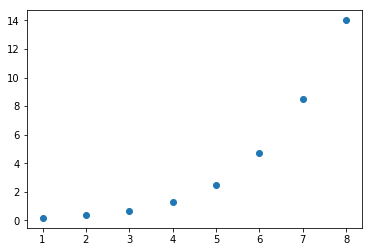

In [3]:
data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]

plt.scatter(range(1,9), data)

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$.

$$
\frac{df}{dx_1} = x_2^t\\
\frac{df}{dx_2} = x_1 t x_2^{t-1}
$$

Text(0, 0.5, 'Bacterial population (billions)')

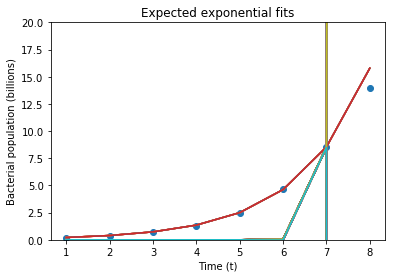

In [4]:
plt.scatter(range(1,9), data)

for k in range(0,100):
    # very dependent of seed so try a couple of times for a nice convergence
    x = np.random.rand(1,2)
    #print(x.shape)
    r = np.zeros((len(data),1))

    J = np.zeros((len(data),2))
    for i in range(0,200):
        for t in range(1, len(data)):
            J[t][0] = -x[0][1]**t
            J[t][1] = -t*x[0][0]*(x[0][1]**(t-1))
            r[t][0] = -1*(data[t-1] - x[0][0]*(x[0][1]**(t)))
        s = np.linalg.lstsq(J, r, rcond=None)[0]
        x += s.transpose()
    plt.plot(range(1,9), x[0][0]*x[0][1]**range(1,9), label="Final Values:" + str(k))

plt.ylim(0, 20)

plt.title("Expected exponential fits")
plt.xlabel("Time (t)")
plt.ylabel("Bacterial population (billions)")

(1, 2)
Start value of x: [[0.94227125 0.99787559]]
The initial population expected is: 0.11540536210706637
The expected growth rate is:  1.8492212245195236


Text(0, 0.5, 'Bacterial population (billions)')

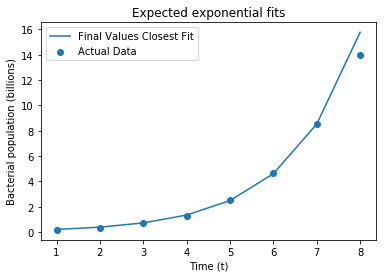

In [5]:
plt.scatter(range(1,9), data, label = "Actual Data")

# very dependent of seed so try a couple of times for a nice convergence
x = np.array([[0.61996606, 0.41497187]])
x = np.array([[0.94227125, 0.99787559]])

# These were good final values x = np.array([[0.11540536, 1.84922122]])
print(x.shape)
r = np.zeros((len(data),1))
print("Start value of x:", x)
J = np.zeros((len(data),2))
for i in range(0,250):
    for t in range(1, len(data)):
        J[t][0] = -x[0][1]**t
        J[t][1] = -t*x[0][0]*(x[0][1]**(t-1))
        r[t][0] = -1*(data[t-1] - x[0][0]*(x[0][1]**(t)))
    s = np.linalg.lstsq(J, r, rcond = None)[0]
    x += s.transpose()
plt.plot(range(1,9), x[0][0]*x[0][1]**range(1,9), label="Final Values Closest Fit")
print("The initial population expected is:", x[0][0])
print("The expected growth rate is: ", x[0][1])
plt.legend()
plt.title("Expected exponential fits")
plt.xlabel("Time (t)")
plt.ylabel("Bacterial population (billions)")

# (b)
By using logarithms to transform the equations, a fit to these data can also be done by linear least squares. Perform such a linear least squares fit to obtain estimates for $P_0$ and $r$, and compare your results with those for the nonlinear fit. Put the corresponding functions in a picture together with the data points and briefly discuss the results.

$$f(t, x_1, x_2, b) = log(x_1\!\cdot x_2^t) + b$$

$$
\frac{df}{dx_1} = 1/x_1\\
\frac{df}{dx_2} = t/x_2\\
\frac{df}{db} = 1\\
$$

The initial population expected is: 0.10147854058089203
The expected growth rate is:  1.8902715600378437
the constant to adjust the y intercept is:  0.5366389412185665


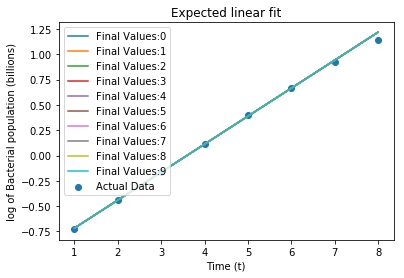

In [6]:
from decimal import Decimal

logdata = [math.log10(x) for x in data]

plt.scatter(range(1,9), logdata, label = "Actual Data")

for k in range(0,10):
    # very dependent of seed so try a couple of times for a nice convergence
    x = np.random.rand(1,3)
    r = np.zeros((len(data),1))

    J = np.zeros((len(logdata),3))
    for i in range(0,50):
        for t in range(1, len(logdata)):
            J[t][0] = -1/x[0][1]
            J[t][1] = -t/x[0][1]
            J[t][2] = 1
            func = x[0][0]*(x[0][1]**(t))
            y = math.log10(func) 
            r[t][0] = -1*(logdata[t-1] - y)
        s = np.linalg.lstsq(J, r, rcond=None)[0]
        x += s.transpose()
    y = range(1,9)
    xplot = []
    for l in y:
        
        xplot.append(math.log10(abs(x[0][0]*x[0][1]**l)))
    plt.plot(range(1,9), xplot,  label="Final Values:" + str(k))

plt.legend()
plt.title("Expected linear fit")
plt.xlabel("Time (t)")
plt.ylabel("log of Bacterial population (billions)")

print("The initial population expected is:", x[0][0])
print("The expected growth rate is: ", x[0][1])
print("the constant to adjust the y intercept is: ", x[0][2])

The expected inital population and the expected growth rate is consisten for the logarithmic linear fit.  Also the logorithmic linear fit needed a constant b to adjust the y intercept.  The exponential fit was very sensitive to the starting values of x, while the linear logarithmic fit was significantly less, most, if not all, of the values tried when randomly creating converged equally well to the actual values.  As time was increasing though, both functions appeared to drift from the experimental data.  If there were more data points, it would be an interesting next step to see what happens to the predictions after the 8th point, if it reconverges or if the fucking stops fitting well.

----------------------
# Exercise 3



Runge's function is given by

$$ f(t) = 1/(1+25t^2).$$

In [7]:
# to make polynomials with different degrees
def make_polynomial(n, x, c):
    y = 0
    for i in range(n + 1):
        y += c[i] * x **i
    return y

# def runge's function
def runge_function(x):
    return 1 / (1 + 25 * x**2)

def vandermonde_matrix(x):
    # take regular monomials as basis
    phi = np.ones((len(x), len(x)))
    
    # set up Vandermonde matrix for basis function
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            phi[i][j] = x[i]**j
    return phi

# proper linspace
x = np.linspace(-1,1, 200000)

In [8]:
runge_y = []

# generate some data points
for point in x:
    runge_y.append(runge_function(point))

pol_degrees = [2,5,10,15,20,25,50,100,150,200,250]

# (a)
Interpolate Runge's function on $[-1,1]$ by a polynomial $p_k$ of degree $k$ for $k = 5,10,15$. Use equally spaced interpolation points. Draw your interpolating polynomials together with $f$.

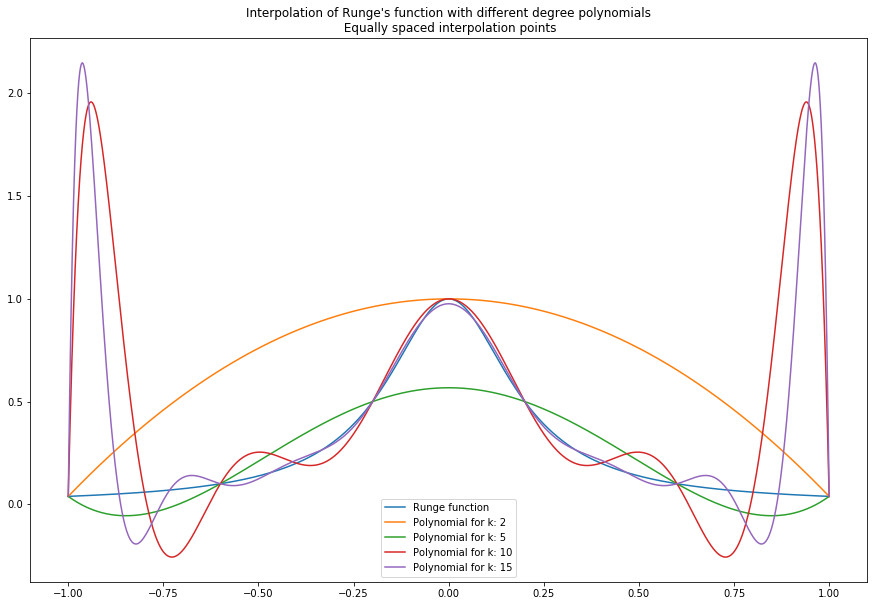

In [9]:
  
plt.figure(figsize=(15,10))

plt.plot(x,runge_y, label="Runge function")    

k_list = [2,5,10,15]

for k in k_list:
    # proper linspace
    interpol_x = np.linspace(-1, 1, k+1)

    k_points = []
    # generate some data points
    for point in interpol_x:
        k_points.append(runge_function(point))

    k_points = np.array(k_points)    

    phi = vandermonde_matrix(interpol_x)
    
    # calculate coefficients
    coefficients = np.linalg.solve(phi, k_points)

    values = []

    for t in x:
        values.append(make_polynomial(k, t, coefficients))
    
    label = "Polynomial for k: " + str(k)
    plt.plot(x,values, label=label)    

plt.title("Interpolation of Runge's function with different degree polynomials\n Equally spaced interpolation points")
plt.legend()

# (b)
Repeat (a) to find polynomials $q_k$. This time use the Chebyshev points as interpolation points. They are given by

$$t_i = \cos \left( \frac{(2i-1)\pi}{2k+2} \right),\, \,i = 1,\ldots,k+1.$$

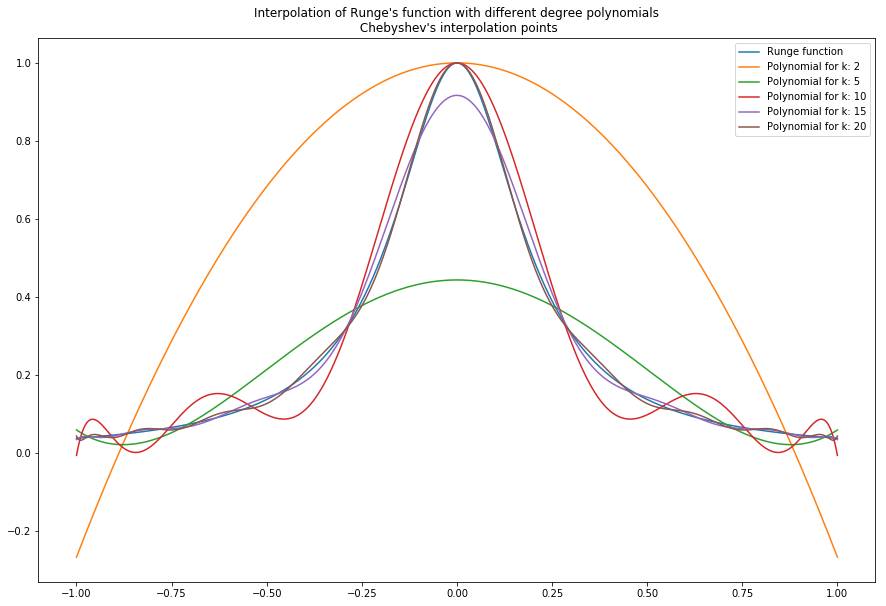

In [10]:
plt.figure(figsize=(15,10))
plt.plot(x,runge_y, label="Runge function")    

y_coordinates = []

for k in pol_degrees:
    
    # chebyshev interpolation points
    interpol_x = []
    for i in range(1, k+2):
        interpol_x.append(math.cos(((2*i -1) * math.pi)/(2*k+2)))

    y = []
    for point in interpol_x:
        y.append(runge_function(point))

    phi = vandermonde_matrix(interpol_x)
        
    # calculate coefficients
    coefficients = np.linalg.solve(phi, y)

    values = []

    for t in x:
        values.append(make_polynomial(k, t, coefficients))
    
    label = "Polynomial for k: " + str(k)
    
    if k < 25:
        plt.plot(x,values, label=label)   

    y_coordinates.append(values)

plt.title("Interpolation of Runge's function with different degree polynomials\n Chebyshev's interpolation points")
plt.legend()

# (c)
Verify numerically that the maximum of the difference of $f$ and $q_k$ in the interval $[-1,1]$ decreases with increasing $k$ by trying various values of $k$.

We tried various values of k, from 2 to 250. As we can verify with just looking at the data, we can see that the difference between runge's function and the polynomial for $q_{20}$ is way lower than the difference between runge's function and $q_2$. This is verified numerically in the codeblock below. We can see that for $q_{25}$ the biggest difference with runge's function in the interval $[-1,1]$ is 0.011 which is already quite good. It appears that for some of the degrees of the polynomial the function does not fit as well as lower numbers, but overall, it seems that the higher degree the better the fit.

Max difference for k: 2 is: 0.6005977510156157
Max difference for k: 5 is: 0.5559113382147847
Max difference for k: 10 is: 0.10915351081663516
Max difference for k: 15 is: 0.08310704746692865
Max difference for k: 20 is: 0.01533373515512454
Max difference for k: 25 is: 0.011414985455416415
Max difference for k: 50 is: 0.003895174229209847
Max difference for k: 100 is: 0.010139273495768951
Max difference for k: 150 is: 0.022269496491537852
Max difference for k: 200 is: 0.005132323407870558
Max difference for k: 250 is: 0.003265294519119097


Text(0.5, 1.0, 'Max Difference Between x and q for Different Values of k')

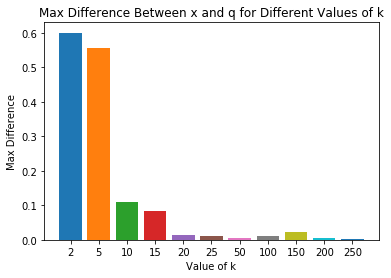

In [13]:
xlabels = ("2","5","10","15","20","25","50","100","150","200","250")
y_pos = np.arange(len(xlabels))

for i in range(len(y_coordinates)):
    runge_y = np.array(runge_y)
    coordinates_list = np.array(y_coordinates[i])
    differences  = abs(runge_y - coordinates_list)
    
    print("Max difference for k: " + str(pol_degrees[i]) + " is: " + str(max(differences)))
    
    plt.bar(xlabels[i], max(differences))
    

plt.xlabel("Value of k")
plt.ylabel("Max Difference")
plt.title("Max Difference Between x and q for Different Values of k")